In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [159]:
print(train.shape)
print(test.shape)

(29305, 16)
(19537, 15)


In [6]:
train['income'].value_counts()

0    22260
1     7045
Name: income, dtype: int64

In [87]:
data_all = pd.concat([train.iloc[:,:-1], test])
data_all.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [77]:
y = train['income']

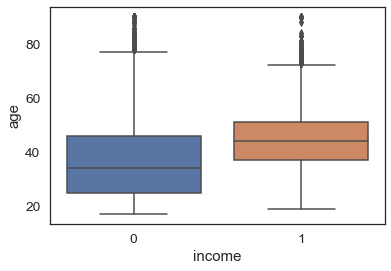

In [140]:
sns.boxplot(train['income'], train['age'])

In [ ]:
sns.distplot(train['age'][train['income']==1], hist=False, label='1')
sns.distplot(train['age'][train['income']==0], hist=False, label='0')
plt.legend()

In [113]:
pd.cut(train['capital-gain'], [-1,0,100000], labels=['0','1 <']).value_counts()

0      26883
1 <     2422
Name: capital-gain, dtype: int64

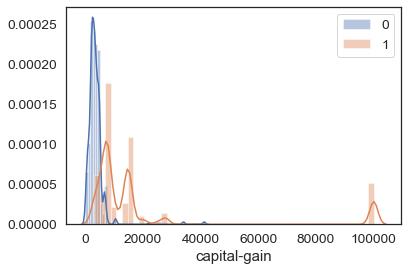

In [156]:
sns.distplot(train['capital-gain'][(train['income']==0) & (train['capital-gain']!=0)], label='0')
sns.distplot(train['capital-gain'][(train['income']==1) & (train['capital-gain']!=0)], label='1')
plt.legend()

In [114]:
pd.cut(train['capital-loss'], [-1,0,100000], labels=['0','1 <']).value_counts()

0      27936
1 <     1369
Name: capital-loss, dtype: int64

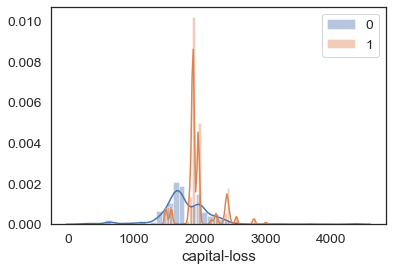

In [155]:
sns.distplot(train['capital-loss'][(train['income']==0) & (train['capital-loss']!=0)], label='0')
sns.distplot(train['capital-loss'][(train['income']==1) & (train['capital-loss']!=0)], label='1')
plt.legend()

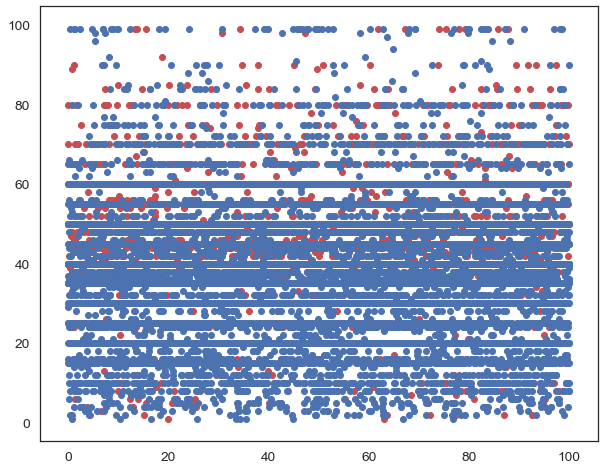

In [128]:
plt.figure(figsize=(10,8))
plt.scatter(np.linspace(0,100, len(train['hours-per-week'][train['income']==1])),train['hours-per-week'][train['income']==1], c='r')
plt.scatter(np.linspace(0,100, len(train['hours-per-week'][train['income']==0])),train['hours-per-week'][train['income']==0], c='b')

In [ ]:
train['hours-per-week']

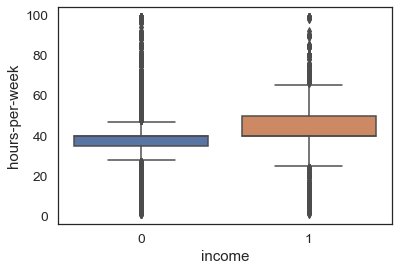

In [135]:
sns.boxplot(train['income'], train['hours-per-week'])

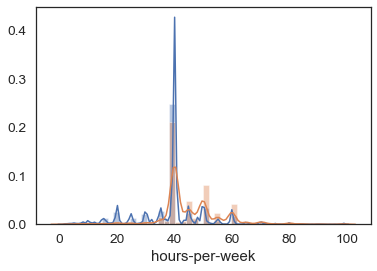

In [148]:
sns.distplot(train['hours-per-week'][(train['income']==0)])
sns.distplot(train['hours-per-week'][(train['income']==1)])

In [130]:
train['hours-per-week'][train['income']==0].describe()

count    22260.000000
mean        38.837107
std         12.278957
min          1.000000
25%         35.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [136]:
train['hours-per-week'][train['income']==1].describe()

count    7045.000000
mean       45.505039
std        11.069492
min         1.000000
25%        40.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: hours-per-week, dtype: float64

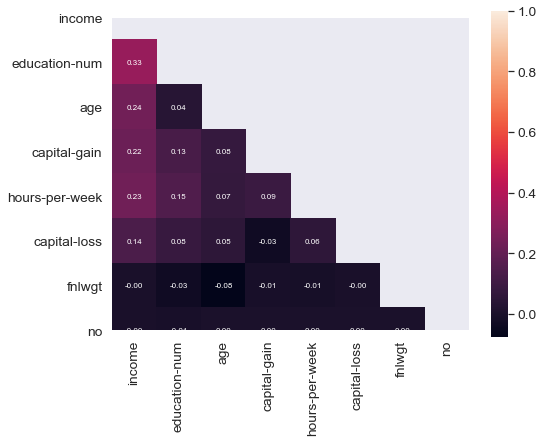

In [14]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = abs(train.corr(method='spearman')) # correlation 전체 변수에 대해서 계산
cols = corrmat.nlargest(k, 'income').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(train[cols].values.T) # correlation 특정 컬럼에 대해서
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))

#Sokratis Kouvaras help to hide upper symmetric metrics
mask = np.zeros_like(cm) 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("white")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values, mask = mask)
plt.show()
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)

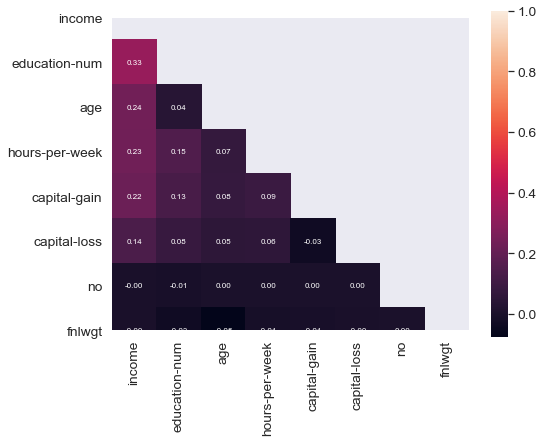

In [13]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = abs(train.corr(method='pearson')) # correlation 전체 변수에 대해서 계산
cols = corrmat.nlargest(k, 'income').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(train[cols].values.T) # correlation 특정 컬럼에 대해서
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))

#Sokratis Kouvaras help to hide upper symmetric metrics
mask = np.zeros_like(cm) 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("white")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values, mask = mask)
plt.show()
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)

In [30]:
data = pd.concat([train['income'], train['education-num']], axis=1)

In [73]:
edu_income = pd.DataFrame([data['education-num'][data['income']==0].value_counts().sort_index(), data['education-num'][data['income']==1].value_counts().sort_index()], index=[0,1])

In [74]:
edu_income

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,46.0,146.0,318.0,530.0,407.0,774.0,996.0,388.0,7925.0,5301.0,914.0,726.0,2850.0,724.0,125.0,90.0
1,NaN,2.0,16.0,44.0,23.0,42.0,61.0,27.0,1510.0,1257.0,316.0,254.0,1998.0,863.0,375.0,257.0


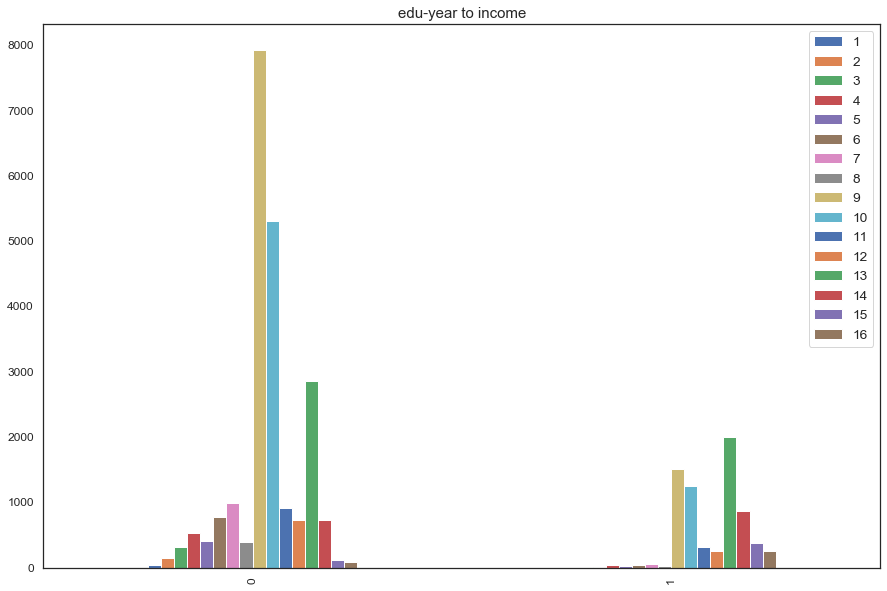

In [75]:
ax = edu_income.plot(kind='bar', title ="edu-year to income", figsize=(15, 10), legend=True, fontsize=12)

In [1]:
pd.cut(train['education-num'], [-1,10,1000], labels=['0','1 <']).value_counts()

NameError: name 'pd' is not defined

In [142]:
total = train.isnull().sum().sort_values(ascending=False)
total

income            0
native-country    0
hours-per-week    0
capital-loss      0
capital-gain      0
sex               0
race              0
relationship      0
occupation        0
marital-status    0
education-num     0
education         0
fnlwgt            0
workclass         0
age               0
no                0
dtype: int64

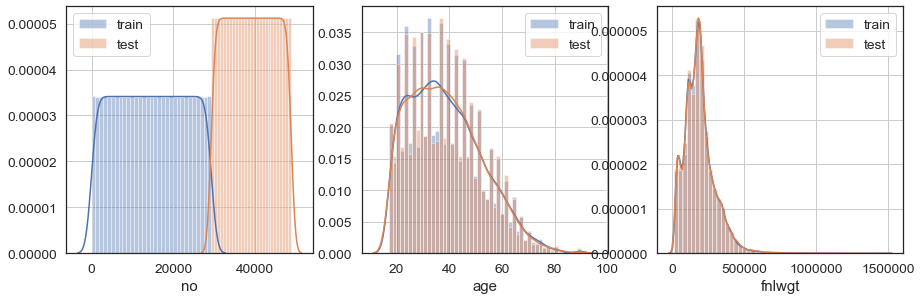

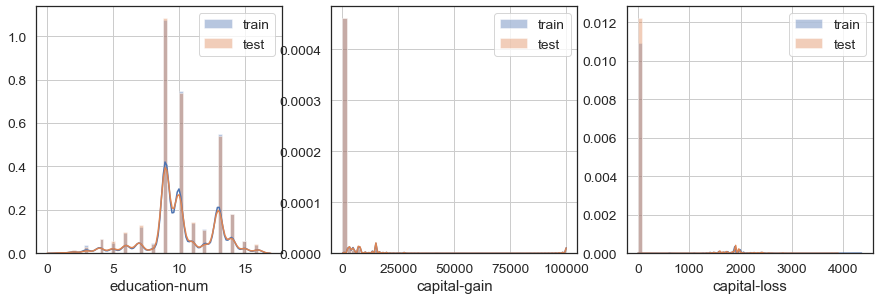

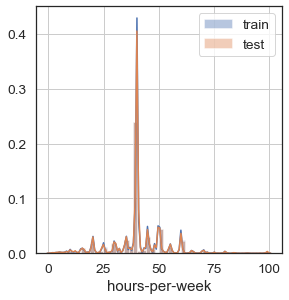

In [147]:
tmp_train = train.copy()
del tmp_train['income']
Numeric_columns = tmp_train.select_dtypes(include = ["int64","float64"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(Numeric_columns):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(tmp_train[c].dropna())
            sns.distplot(test[c].dropna())
            plt.legend(['train', 'test'])
            plt.grid()            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1
del tmp_train

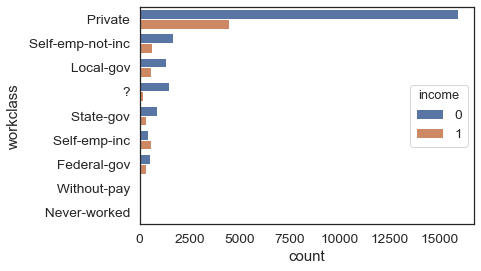

In [167]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='workclass', hue='income', data = pd.concat([cat_attributes, y], axis=1))

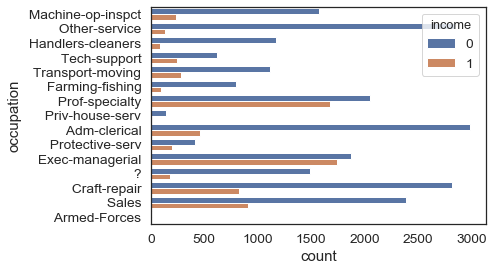

In [168]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='occupation', hue='income', data = pd.concat([cat_attributes, y], axis=1))

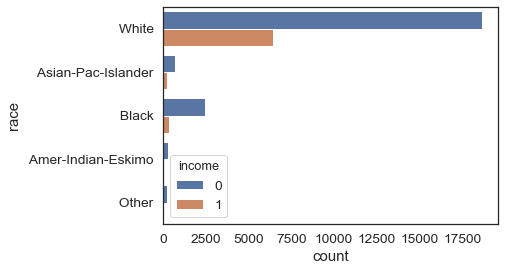

In [170]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='race', hue='income', data = pd.concat([cat_attributes, y], axis=1))

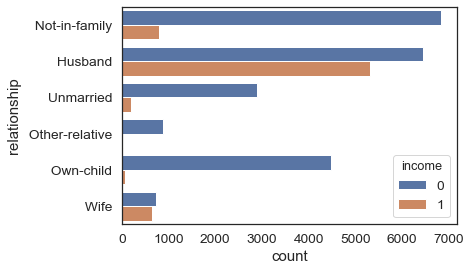

In [171]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='relationship', hue='income', data = pd.concat([cat_attributes, y], axis=1))

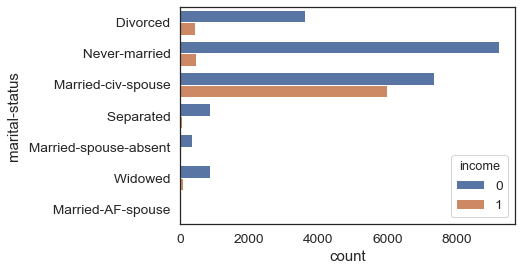

In [172]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='marital-status', hue='income', data = pd.concat([cat_attributes, y], axis=1))